In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import xarray as xr
import cmocean
import pickle
import time
import datetime
from salishsea_tools import viz_tools
from salishsea_tools import geo_tools
from salishsea_tools import grid_tools
from salishsea_tools import utilities
%matplotlib inline

## Extracting timeseries at each of the three locations

In [29]:
Y = np.arange(540); X = np.arange(355)
for year in [2015,2016,2017,2018]:
    filename= ("/home/abhudia/Desktop/ssh,salinity/{}ssh.pickle").format(str(year))
    unpickle = open(filename, "rb")
    locals()["ssh" + str(year)] = pickle.load(unpickle)
    times = np.arange(locals()["ssh" + str(year)].shape[0])
    locals()["ssh" + str(year)] = xr.DataArray(locals()["ssh" + str(year)], coords = [times, Y, X], dims = ['time', 'Y' , 'X'])
    locals()["sog" + str(year)] = locals()["ssh" + str(year)].isel(X = 242, Y = 274).values
    locals()["ssh" + str(year)] = False
    fname = "ssh_sog{}.pickle".format(str(year))
    picklefile = open(fname, 'wb')
    pickle.dump(locals()["sog" + str(year)], picklefile)
    locals()["sog" + str(year)] = False

In [30]:
for year in [2015,2016,2017,2018]:
    filename= ("/home/abhudia/Desktop/ssh,salinity/{}ssh.pickle").format(str(year))
    unpickle = open(filename, "rb")
    locals()["ssh" + str(year)] = pickle.load(unpickle)
    times = np.arange(locals()["ssh" + str(year)].shape[0])
    locals()["ssh" + str(year)] = xr.DataArray(locals()["ssh" + str(year)], coords = [times, Y, X], dims = ['time', 'Y' , 'X'])
    locals()["salmon" + str(year)] = locals()["ssh" + str(year)].isel(X = 258, Y = 56).values
    locals()["ssh" + str(year)] = False
    fname = "ssh_salmon{}.pickle".format(str(year))
    picklefile = open(fname, 'wb')
    pickle.dump(locals()["salmon" + str(year)], picklefile)
    locals()["salmon" + str(year)] = False

In [47]:
for year in [2018]:
    filename= ("/home/abhudia/Desktop/ssh,salinity/{}ssh.pickle").format(str(year))
    unpickle = open(filename, "rb")
    locals()["ssh" + str(year)] = pickle.load(unpickle)
    times = np.arange(locals()["ssh" + str(year)].shape[0])
    locals()["ssh" + str(year)] = xr.DataArray(locals()["ssh" + str(year)], coords = [times, Y, X], dims = ['time', 'Y' , 'X'])
    locals()["turn" + str(year)] = locals()["ssh" + str(year)].isel(X = 240, Y = 143).values
    locals()["ssh" + str(year)] = False
    fname = "ssh_turn{}.pickle".format(str(year))
    picklefile = open(fname, 'wb')
    pickle.dump(locals()["turn" + str(year)], picklefile)
    picklefile.close()
    locals()["turn" + str(year)] = False

## Get timeseries array

In [2]:
ssh = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgSurfaceTracerFields1hV18-06")

In [3]:
times_ssh = ssh.time.sel(time = ssh.time.dt.year.isin([2015,2016,2017,2018])).values.astype('datetime64[D]').astype(datetime.datetime)

## Make ssh series and time series array for each point for each year

In [5]:
for year in [2015, 2016, 2017, 2018]:
    fname = "/home/abhudia/Desktop/SSH/3points/ssh_sog{}.pickle".format(str(year))
    file = open(fname, "rb")
    locals()["ssh_sog" + str(year)] = pickle.load(file)
    locals()["t_sog" + str(year)] = []
    for time in times_ssh: 
        if time.year == year:
            locals()["t_sog" + str(year)].append(time)

In [6]:
for year in [2015, 2016, 2017, 2018]:
    fname = "/home/abhudia/Desktop/SSH/3points/ssh_salmon{}.pickle".format(str(year))
    file = open(fname, "rb")
    locals()["ssh_salmon" + str(year)] = pickle.load(file)
    locals()["t_salmon" + str(year)] = []
    for time in times_ssh: 
        if time.year == year:
            locals()["t_salmon" + str(year)].append(time)

In [7]:
for year in [2015, 2016, 2017, 2018]:
    fname = "/home/abhudia/Desktop/SSH/3points/ssh_turn{}.pickle".format(str(year))
    file = open(fname, "rb")
    locals()["ssh_turn" + str(year)] = pickle.load(file)
    locals()["t_turn" + str(year)] = []
    for time in times_ssh: 
        if time.year == year:
            locals()["t_turn" + str(year)].append(time)

## Function for computing difference between min and max ssh on each day

In [8]:
## Array List/Array -> Listof(Array, Array)
## produce a list where first element is listof Days and second element is listof (Max-Min ssh)
def ssh_amplitudes(ssh_array, times):
    # Returns only one copy of each day, and count of times each day appears
    unique, counts = np.unique(times, return_counts=True) 
    mins = []; maxes = []
    index = 0
    
    # for the numbers of hours in a day, determine the min and max ssh that day
    for count in counts:
        initial = ssh_array[index]
        day_min = initial; day_max = initial
      
        while count != 0:
            ssh = ssh_array[index]
            if ssh < day_min:
                day_min = ssh
            if ssh > day_max:
                day_max = ssh
            index = index + 1
            count = count - 1
            
        # add these values to the lists of max and min ssh    
        mins.append(day_min); maxes.append(day_max)
    
    return([unique, np.asarray(maxes)-np.asarray(mins)])   


## Produce plots

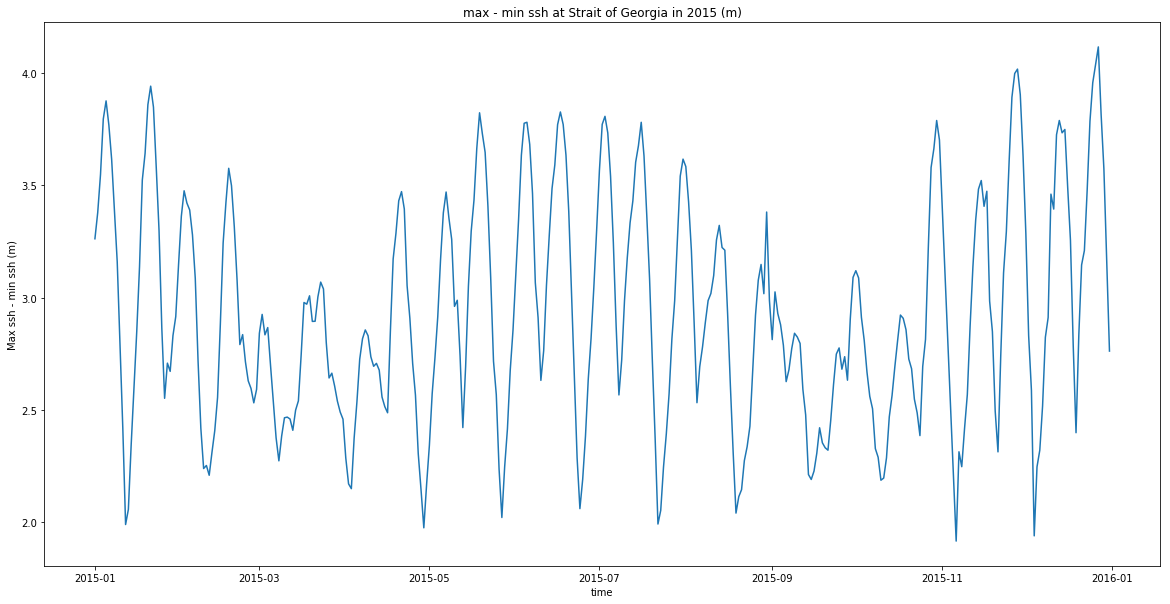

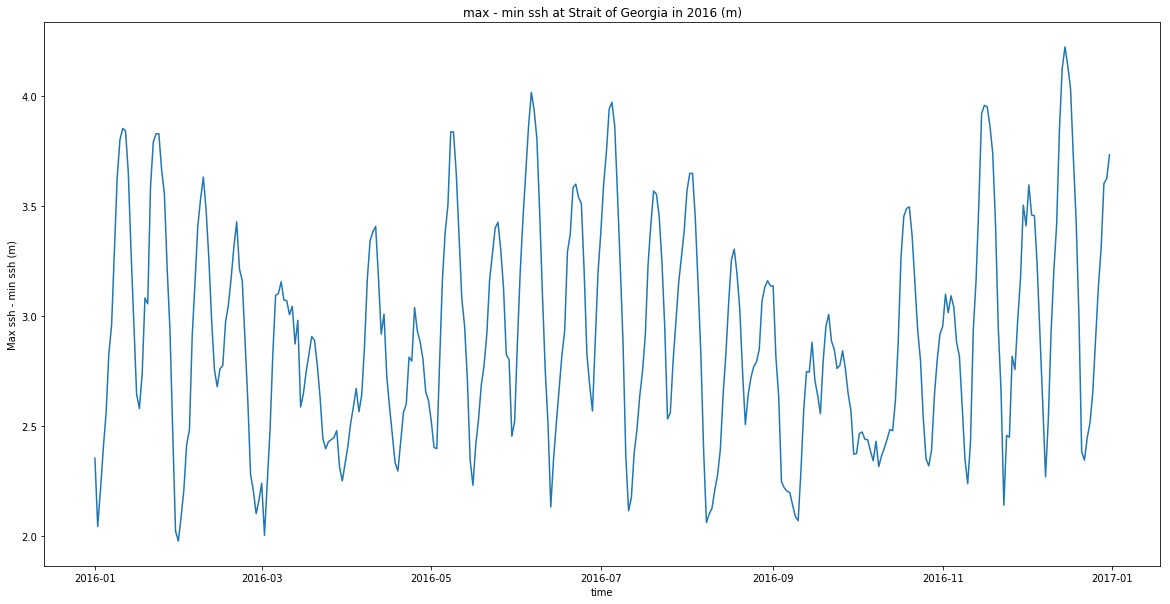

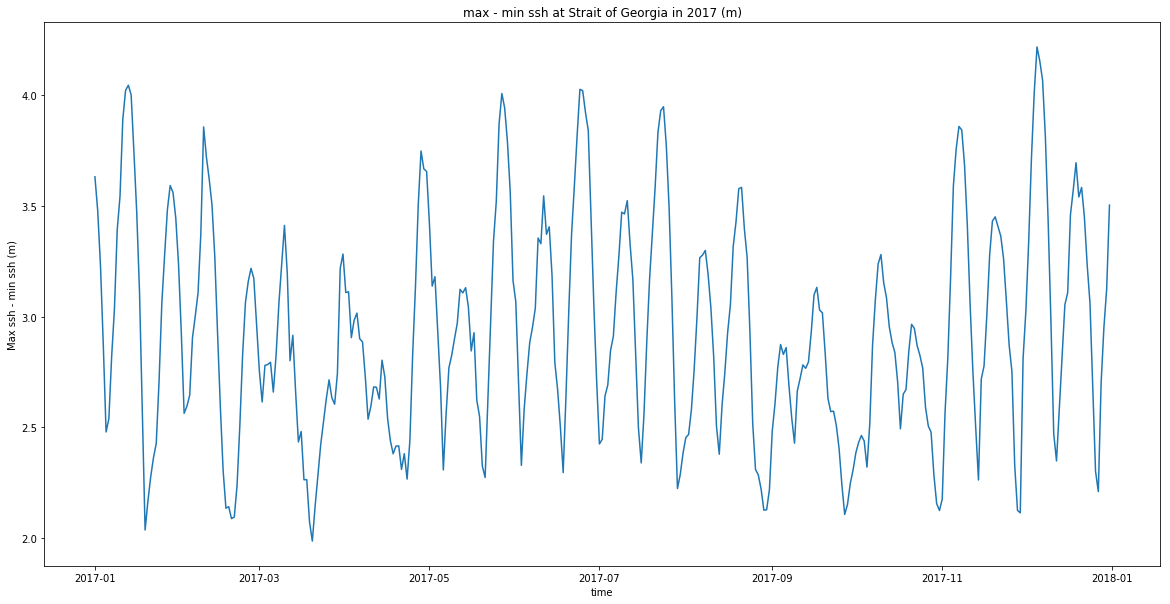

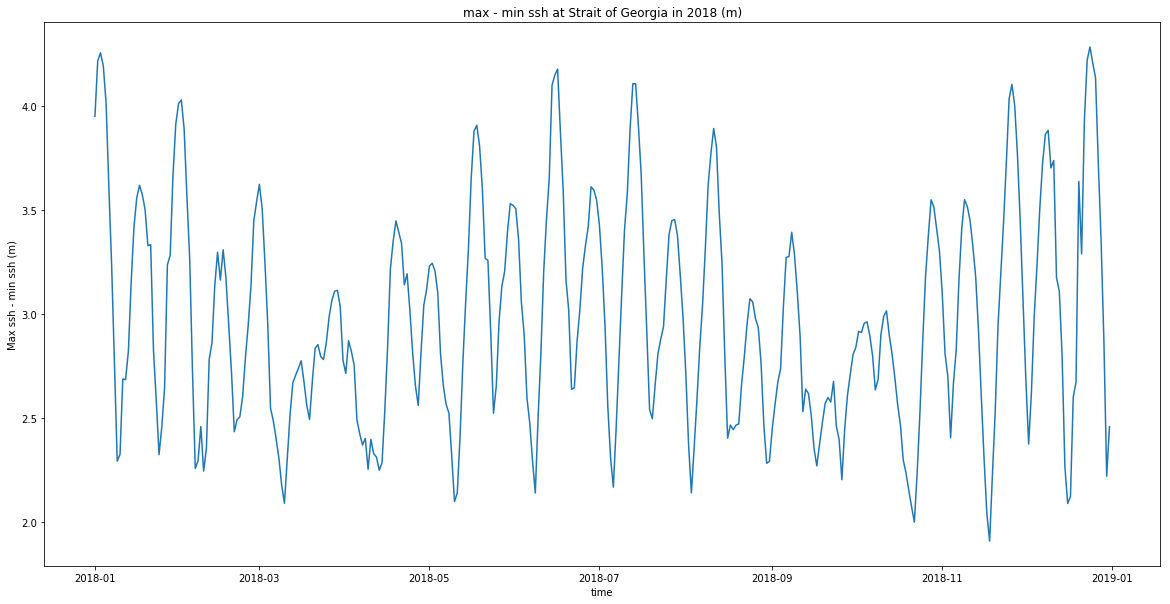

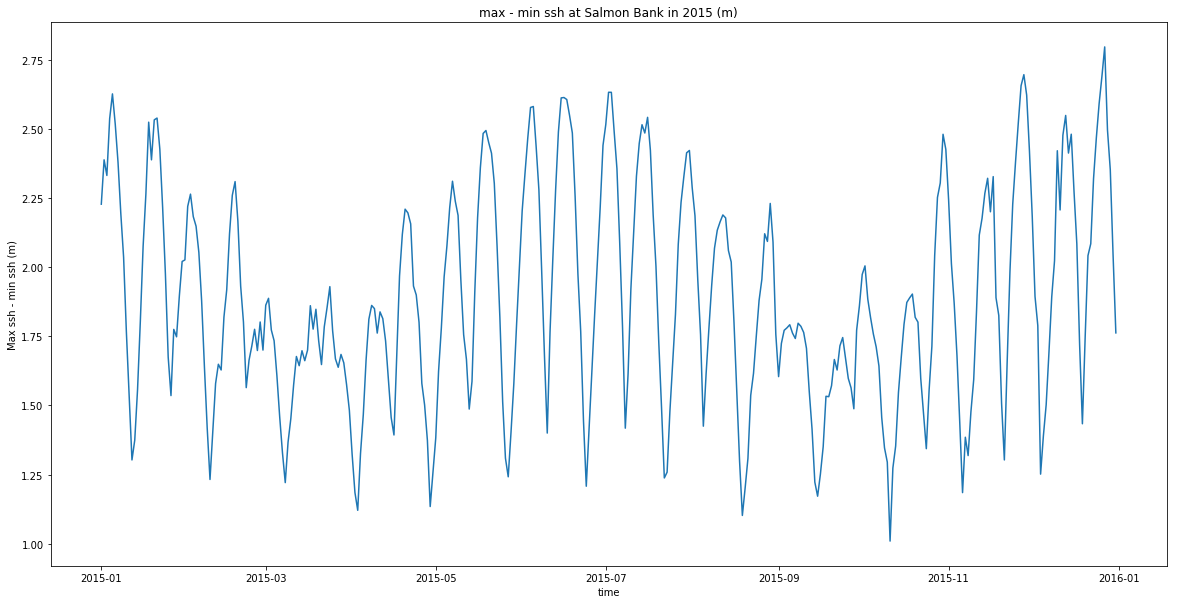

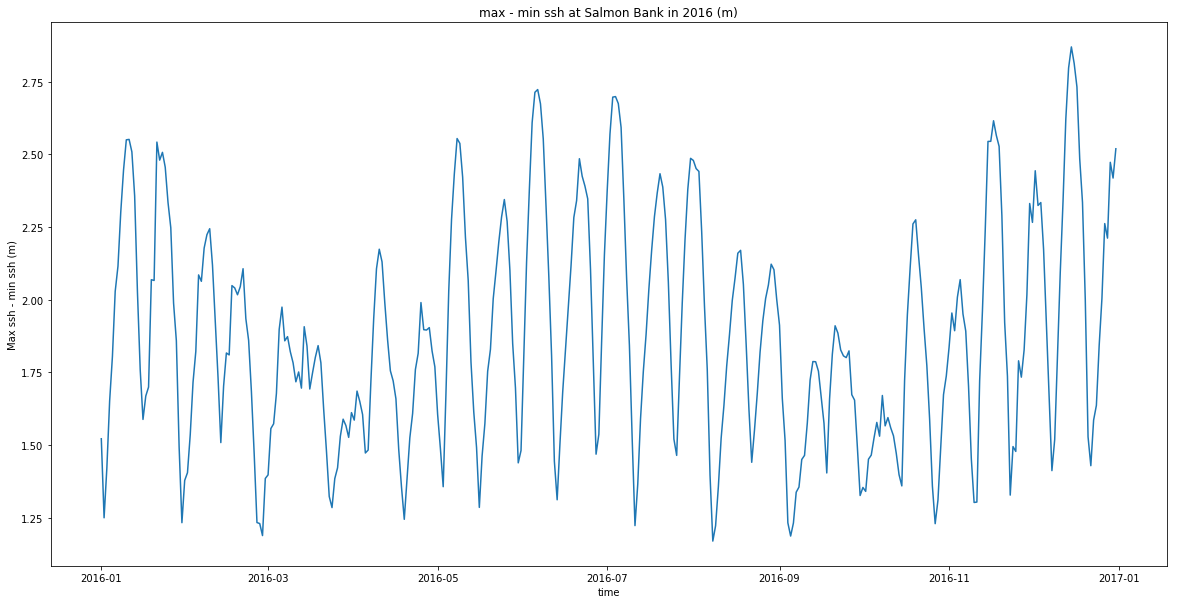

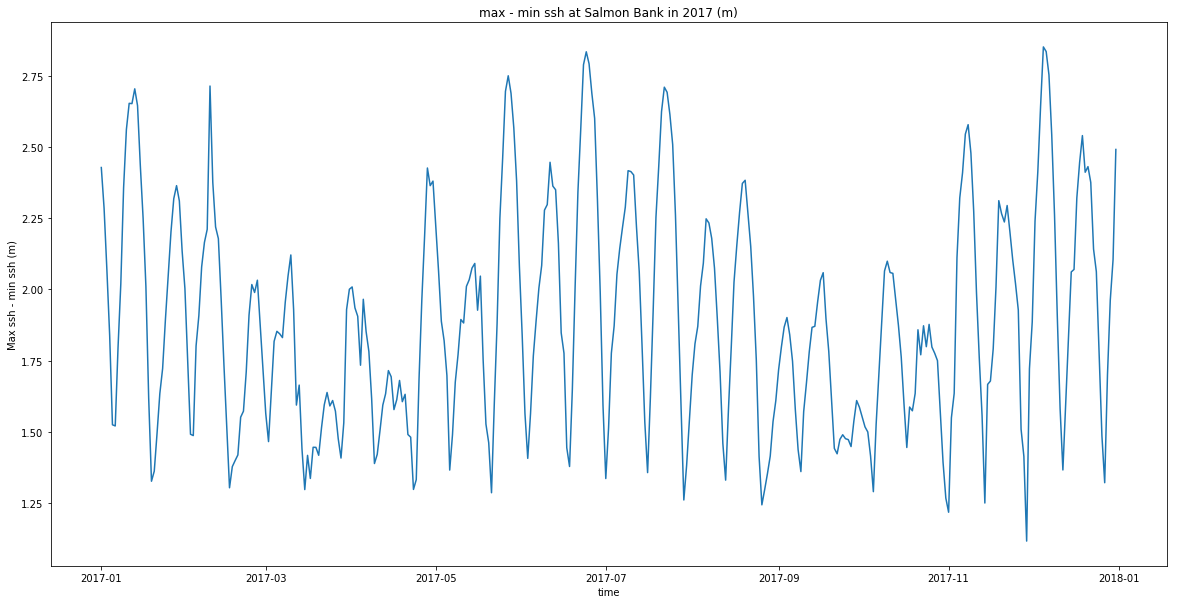

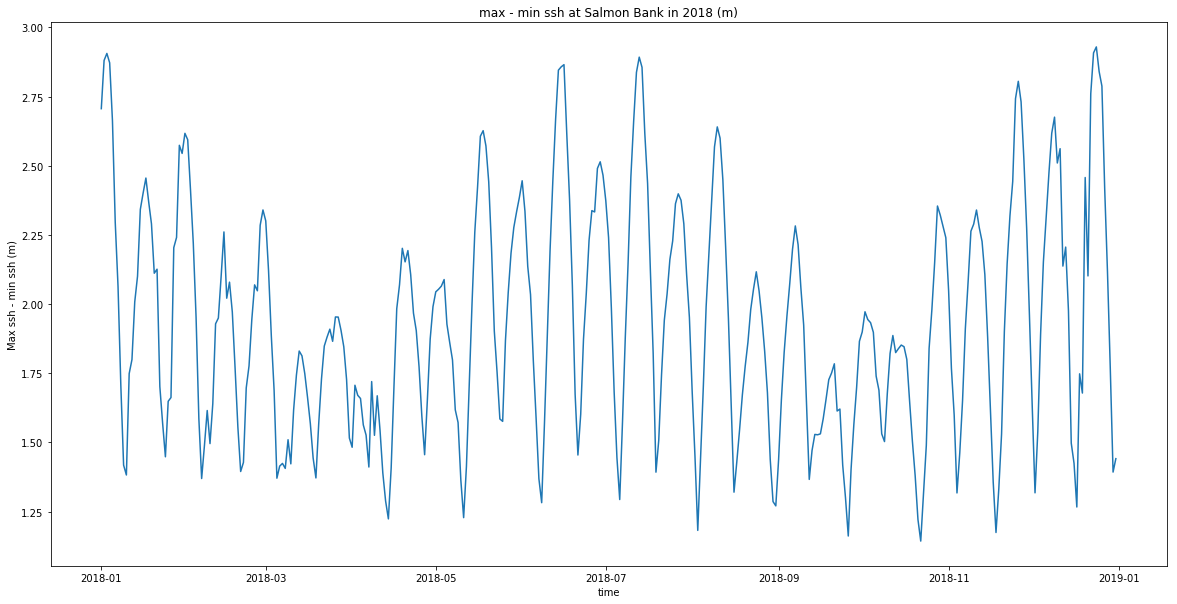

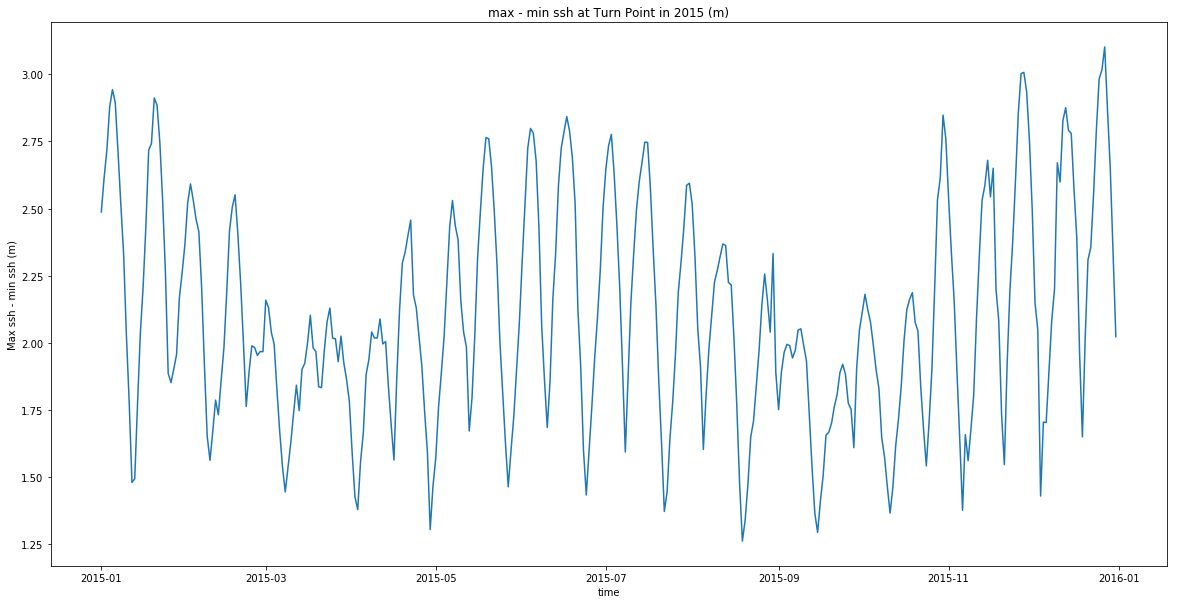

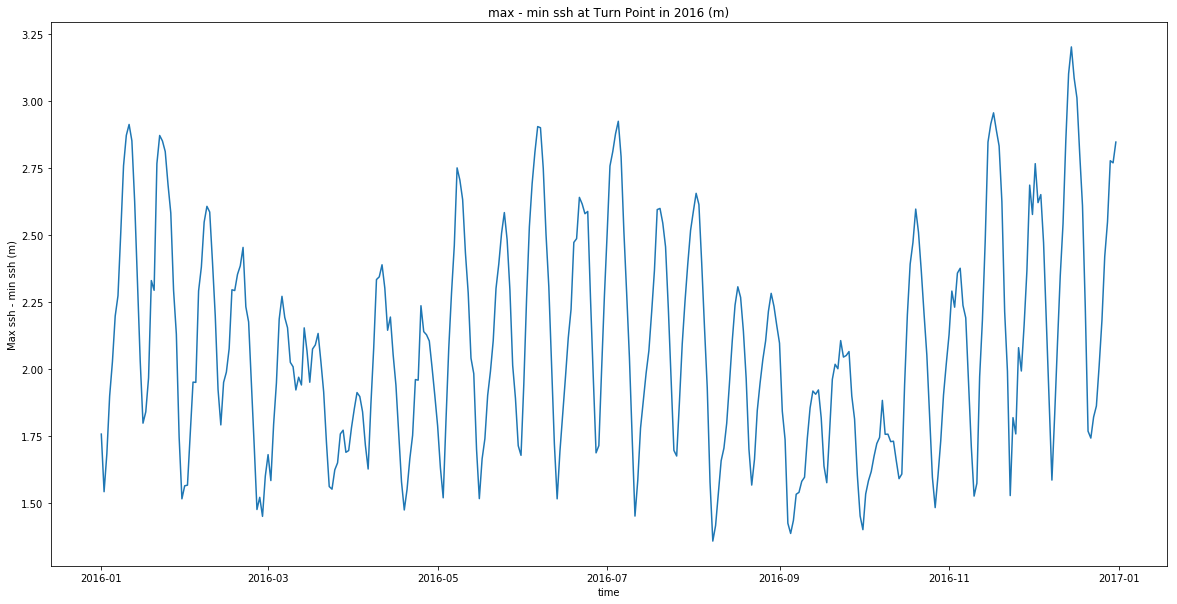

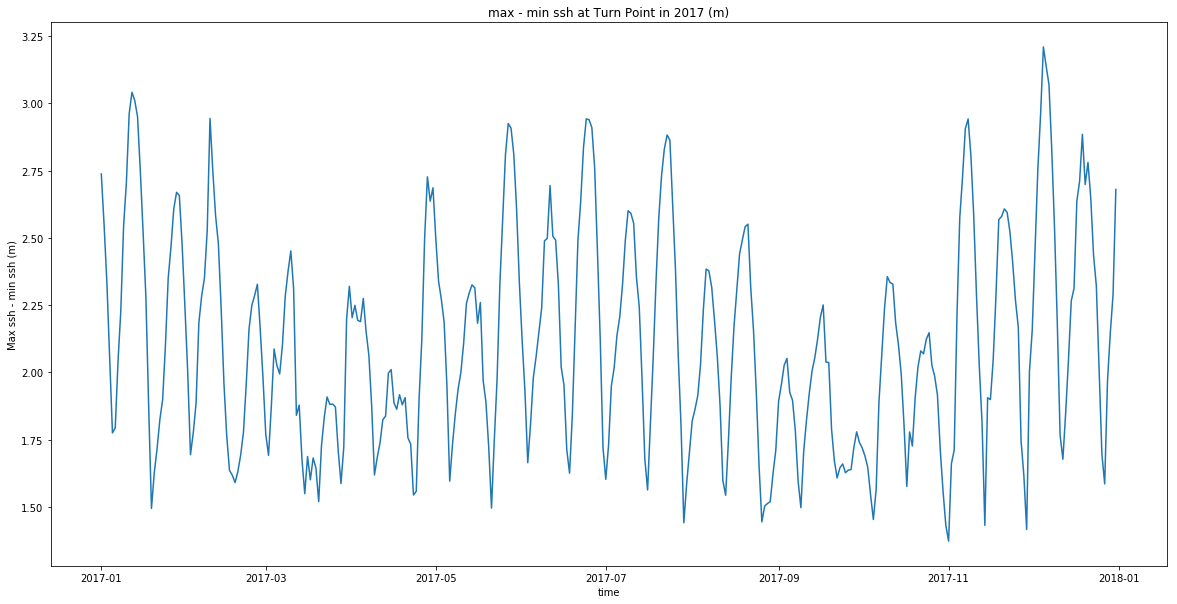

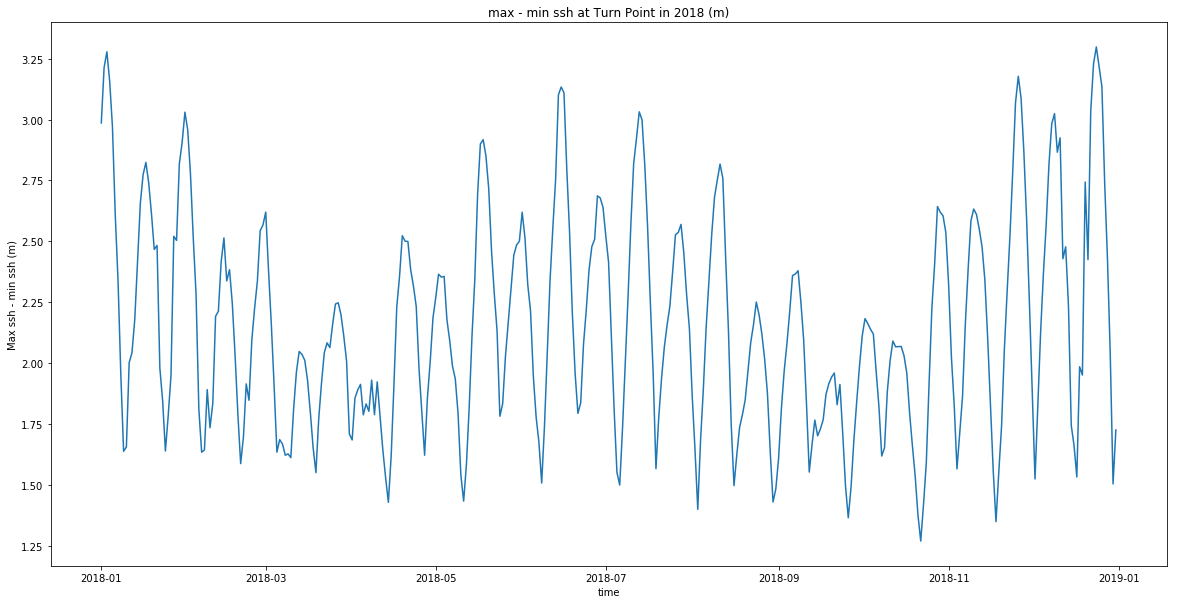

In [21]:
locs = ['sog', 'salmon', 'turn']
locations = ['Strait of Georgia', 'Salmon Bank', 'Turn Point']
years = [2015, 2016, 2017, 2018]

for index in range(3):
    for year in years: 
        ssh_array = "ssh_{}{}".format(locs[index], str(year))
        times = "t_{}{}".format(locs[index], str(year))
        data = ssh_amplitudes(locals()[ssh_array], locals()[times])
        neap = np.argmin(data[1]); spring = np.argmax(data[1])
        label = "The highest spring was on {} ({} m) and the lowest neap was on {} ({} m)".format(str(data[0][spring]), data[1][spring], str(data[0][neap]), data[1][neap])
        fig = plt.figure(figsize=(20,10))
        plt.plot(data[0], data[1], label = label)
        plt.xlabel('time')
        plt.ylabel('Max ssh - min ssh (m)')
        title = 'max - min ssh at {} in {} (m)'.format(locations[index], year)
        plt.legend
        plt.title(title)
